<a href="https://colab.research.google.com/github/fggrava/Challenge_ONE_Data_Science_TelecomX-_2---Prevendo-Churn/blob/main/Challenge_ONE_Data_Science_TelecomX__2_Prevendo_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('/content/TelecomX_Data_normalizado2.csv')

# Conversão de tipos
df['Churn'] = df['Churn'].astype(bool)
df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].astype('category')
df['customer_tenure'] = df['customer_tenure'].astype(int)
df['account_Charges_Monthly'] = df['account_Charges_Monthly'].astype(float)
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')

# Tratamento de valores ausentes
df.dropna(subset=['account_Charges_Total'], inplace=True)


# Estatísticas descritivas
print("Resumo estatístico:")
print(df.describe())

Resumo estatístico:
       customer_tenure  account_Charges_Monthly  account_Charges_Total  \
count      7256.000000              7256.000000            7256.000000   
mean         32.395535                64.755423            2280.634213   
std          24.558067                30.125739            2268.632997   
min           1.000000                18.250000              18.800000   
25%           9.000000                35.450000             400.225000   
50%          29.000000                70.300000            1391.000000   
75%          55.000000                89.900000            3785.300000   
max          72.000000               118.750000            8684.800000   

       Contas_Diarias  qtd_servicos  
count     7256.000000   7256.000000  
mean         2.158467      2.034454  
std          1.004282      1.848105  
min          0.610000      0.000000  
25%          1.180000      0.000000  
50%          2.340000      2.000000  
75%          3.000000      3.000000  
max      

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7256 non-null   object  
 1   Churn                      7256 non-null   bool    
 2   customer_gender            7256 non-null   object  
 3   customer_SeniorCitizen     7256 non-null   category
 4   customer_Partner           7256 non-null   object  
 5   customer_Dependents        7256 non-null   object  
 6   customer_tenure            7256 non-null   int64   
 7   phone_PhoneService         7256 non-null   object  
 8   phone_MultipleLines        7256 non-null   bool    
 9   internet_InternetService   7256 non-null   object  
 10  internet_OnlineSecurity    7256 non-null   bool    
 11  internet_OnlineBackup      7256 non-null   bool    
 12  internet_DeviceProtection  7256 non-null   bool    
 13  internet_TechSupport       7256 non-nu

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Evita alterações no original
df = df.copy()

# Transformação de variáveis booleanas para inteiros
bool_cols = df.select_dtypes(include='bool').columns.tolist()
df[bool_cols] = df[bool_cols].astype(int)

#  Conversão de colunas categóricas para numéricas
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols.remove('customerID')  # Removido porque é apenas identificador
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

#  Normalização de colunas numéricas
num_cols = ['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total', 'Contas_Diarias', 'qtd_servicos']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Separando features e target
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn'].astype(int)  # Target binário

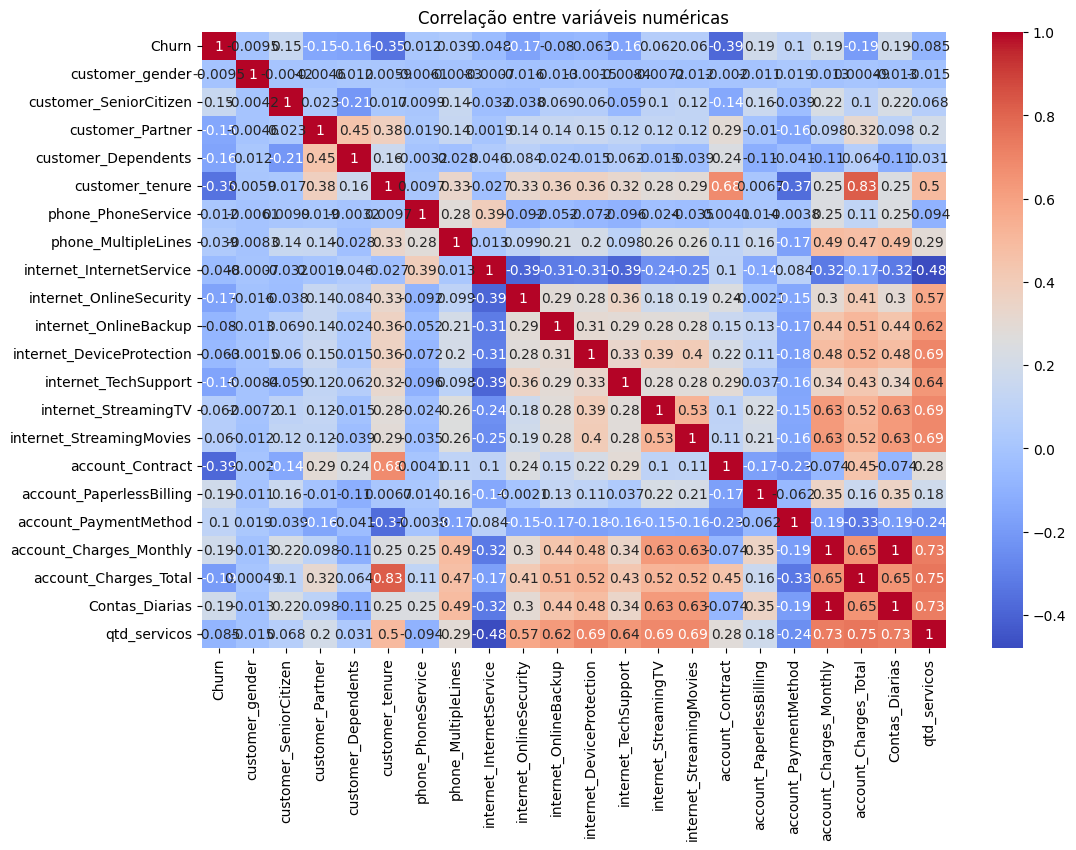

In [8]:
# Ver correlação com a variável target
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlação entre variáveis numéricas")
plt.show()

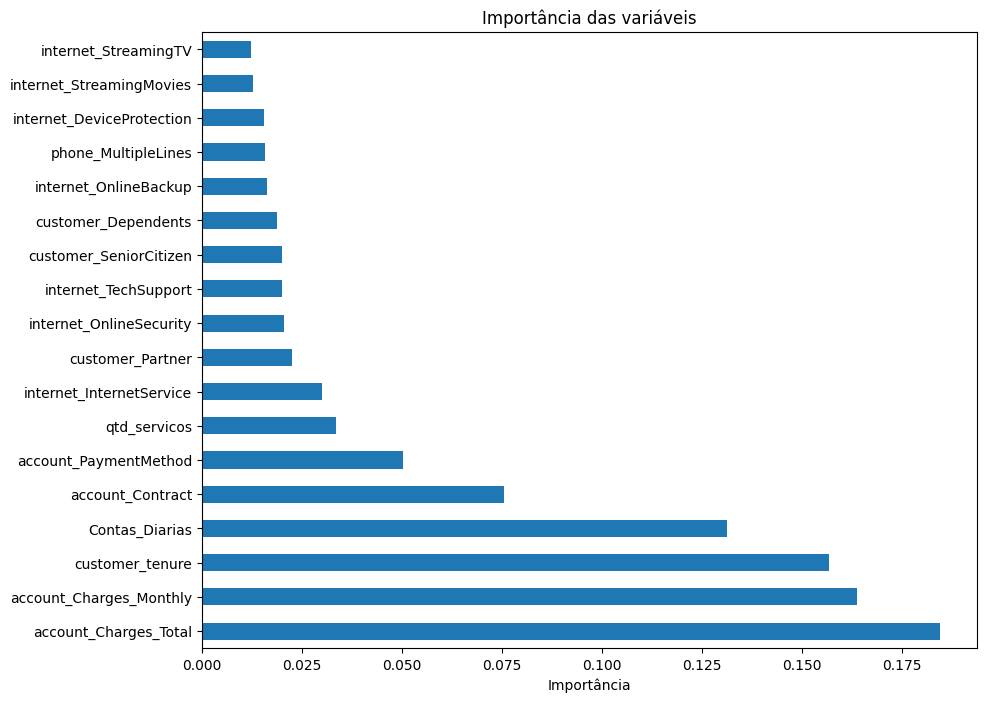

In [9]:
# Eliminar colunas não úteis
drop_cols = ['customerID', 'customer_gender', 'phone_PhoneService', 'account_PaperlessBilling']
df_clean = df.drop(columns=drop_cols)

# Verificar importância das variáveis com modelo simples
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Preparando dados
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn'].astype(int)

# Codificação de variáveis categóricas (simples)
X = pd.get_dummies(X)

# Treinamento básico para análise de importância
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Plotar importância
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=(10, 8), title="Importância das variáveis")
plt.xlabel("Importância")
plt.show()

**Análises direcionadas**

/tmp/ipython-input-32-1890357503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='customer_tenure', data=df, palette='Set2')


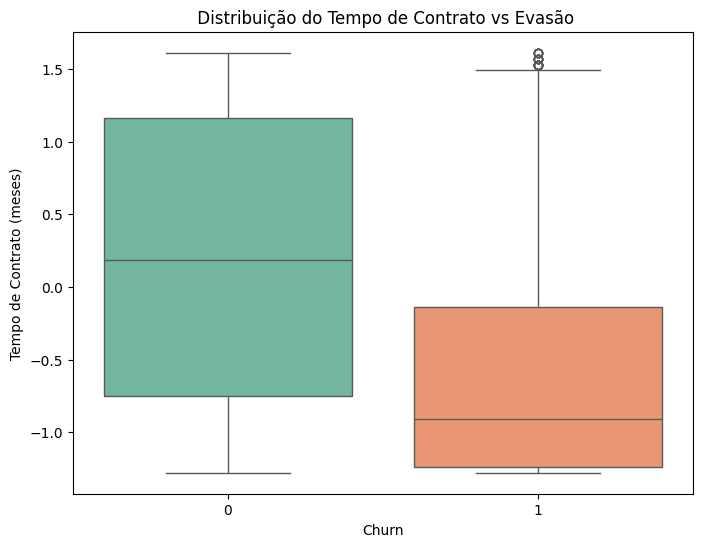

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer_tenure', data=df, palette='Set2')
plt.title(" Distribuição do Tempo de Contrato vs Evasão")
plt.xlabel("Churn")
plt.ylabel("Tempo de Contrato (meses)")
plt.show()

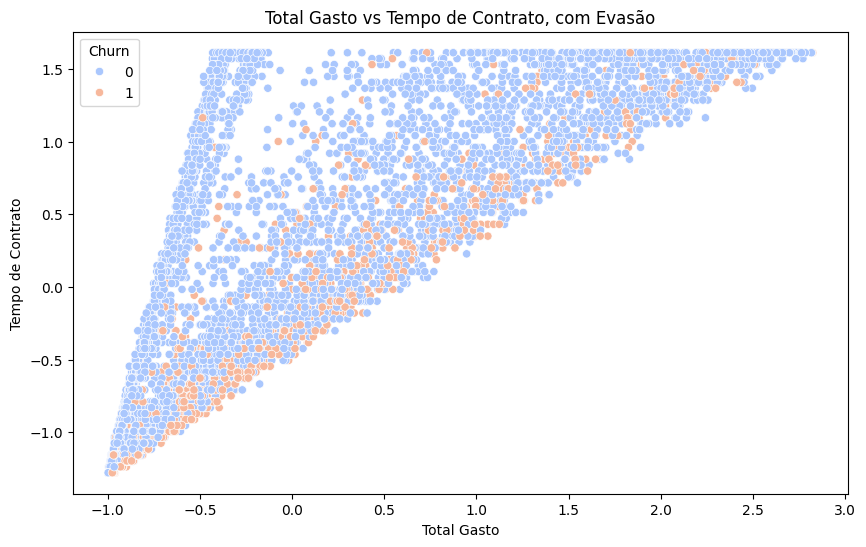

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='account_Charges_Total', y='customer_tenure', hue='Churn', data=df, palette='coolwarm')
plt.title("Total Gasto vs Tempo de Contrato, com Evasão")
plt.xlabel("Total Gasto")
plt.ylabel("Tempo de Contrato")
plt.legend(title='Churn')
plt.show()

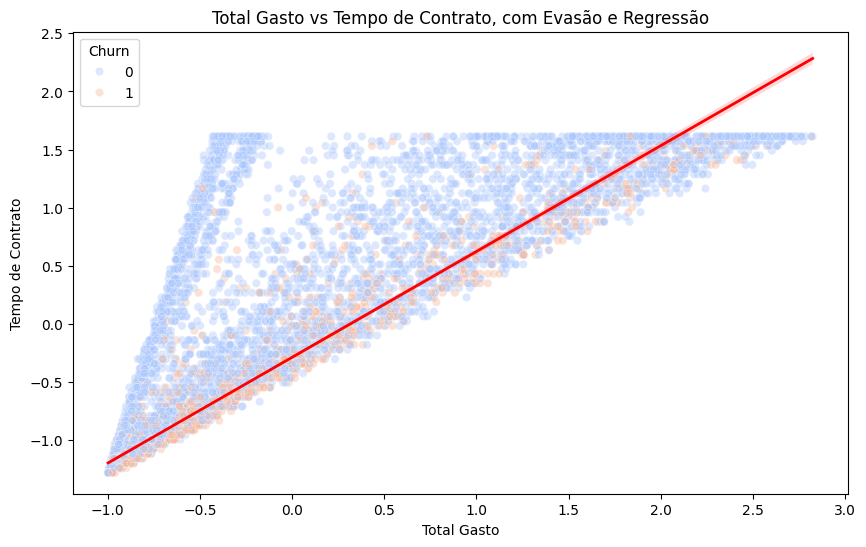

In [34]:
import matplotlib.pyplot as plt

# Filtra apenas clientes que evadiram
df_churn_1 = df[df['Churn'] == 1]

plt.figure(figsize=(10, 6))

# Dispersão para todos os dados, com Churn colorido
sns.scatterplot(
    x='account_Charges_Total',
    y='customer_tenure',
    hue='Churn',
    data=df,
    palette='coolwarm',
    alpha=0.4
)

# Linha de regressão para churn=1
sns.regplot(
    x='account_Charges_Total',
    y='customer_tenure',
    data=df_churn_1,
    scatter=False,
    color='red',
    line_kws={'label': 'Churn = 1 (Regressão)', 'linewidth': 2}
)

plt.title("Total Gasto vs Tempo de Contrato, com Evasão e Regressão")
plt.xlabel("Total Gasto")
plt.ylabel("Tempo de Contrato")
plt.legend(title='Churn')
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Filtra clientes que evadiram
df_churn_1 = df[df['Churn'] == 1]

# Reshape para regressão
X_churn = df_churn_1['account_Charges_Total'].values.reshape(-1, 1)
y_churn = df_churn_1['customer_tenure'].values

# Ajusta modelo
modelo_linear = LinearRegression()
modelo_linear.fit(X_churn, y_churn)

# Coeficientes
coef = modelo_linear.coef_[0]
intercept = modelo_linear.intercept_

print("Regressão linear para clientes que evadiram (Churn = 1):")
print(f"Inclinação (coeficiente): {coef:.3f}")
print(f"Intercepto: {intercept:.3f}")

Regressão linear para clientes que evadiram (Churn = 1):
Inclinação (coeficiente): 0.910
Intercepto: -0.287


In [36]:
# Regressão para clientes que permaneceram
df_churn_0 = df[df['Churn'] == 0]
X_no_churn = df_churn_0['account_Charges_Total'].values.reshape(-1, 1)
y_no_churn = df_churn_0['customer_tenure'].values

modelo_no_churn = LinearRegression()
modelo_no_churn.fit(X_no_churn, y_no_churn)

coef_no_churn = modelo_no_churn.coef_[0]
intercept_no_churn = modelo_no_churn.intercept_

# Impressão dos resultados
print("📊 Comparativo de regressões lineares:")
print("➡ Clientes que evadiram (Churn = 1):")
print(f"   Inclinação: {coef:.3f}")
print(f"   Intercepto: {intercept:.3f}")

print("➡ Clientes que permaneceram (Churn = 0):")
print(f"   Inclinação: {coef_no_churn:.3f}")
print(f"   Intercepto: {intercept_no_churn:.3f}")

📊 Comparativo de regressões lineares:
➡ Clientes que evadiram (Churn = 1):
   Inclinação: 0.910
   Intercepto: -0.287
➡ Clientes que permaneceram (Churn = 0):
   Inclinação: 0.760
   Intercepto: 0.117


/tmp/ipython-input-38-618494361.py:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


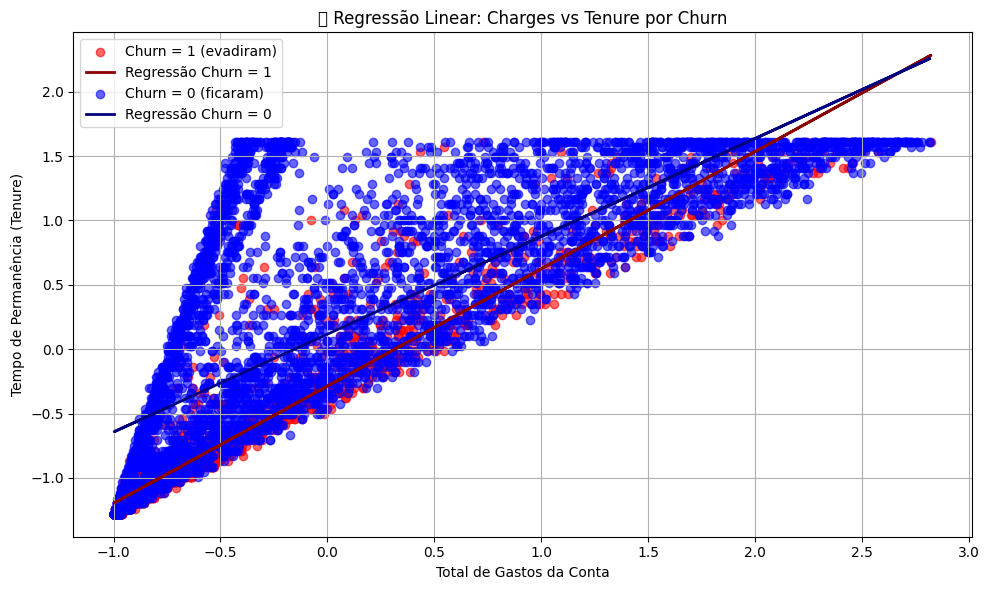

In [38]:
import matplotlib.pyplot as plt

# Dados dos dois grupos
X_churn_flat = X_churn.flatten()
X_no_churn_flat = X_no_churn.flatten()

# Previsões
y_pred_churn = modelo_linear.predict(X_churn)
y_pred_no_churn = modelo_no_churn.predict(X_no_churn)

# Cria o gráfico
plt.figure(figsize=(10, 6))

# Clientes que evadiram
plt.scatter(X_churn_flat, y_churn, color='red', alpha=0.6, label='Churn = 1 (evadiram)')
plt.plot(X_churn_flat, y_pred_churn, color='darkred', linewidth=2, label='Regressão Churn = 1')

# Clientes que permaneceram
plt.scatter(X_no_churn_flat, y_no_churn, color='blue', alpha=0.6, label='Churn = 0 (ficaram)')
plt.plot(X_no_churn_flat, y_pred_no_churn, color='navy', linewidth=2, label='Regressão Churn = 0')

# Estética
plt.title('📊 Regressão Linear: Charges vs Tenure por Churn')
plt.xlabel('Total de Gastos da Conta')
plt.ylabel('Tempo de Permanência (Tenure)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Preparação dos dados**

In [39]:
# Remove valores nulos
df = df.dropna()

# Converte variáveis categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Define variáveis independentes e alvo
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

**Separação em treino e teste**

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

**Treinamento do modelo**

In [42]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [43]:
modelo.feature_importances_


array([0.        , 0.01137382, 0.        , ..., 0.        , 0.        ,
       0.        ])

**Avaliação do Modelo**

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = modelo.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Acurácia: {accuracy_score(y_test, y_pred):.3f}")

[[1420  196]
 [ 281  280]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1616
           1       0.59      0.50      0.54       561

    accuracy                           0.78      2177
   macro avg       0.71      0.69      0.70      2177
weighted avg       0.77      0.78      0.77      2177

Acurácia: 0.781


**Ajuste de Hiperparâmetros – Árvore de Decisão**

In [45]:
from sklearn.model_selection import GridSearchCV

# Parâmetros a testar
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Busca com validação cruzada
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(" Melhor modelo encontrado:", best_model)

 Melhor modelo encontrado: DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)


**Visualização interpretavel**

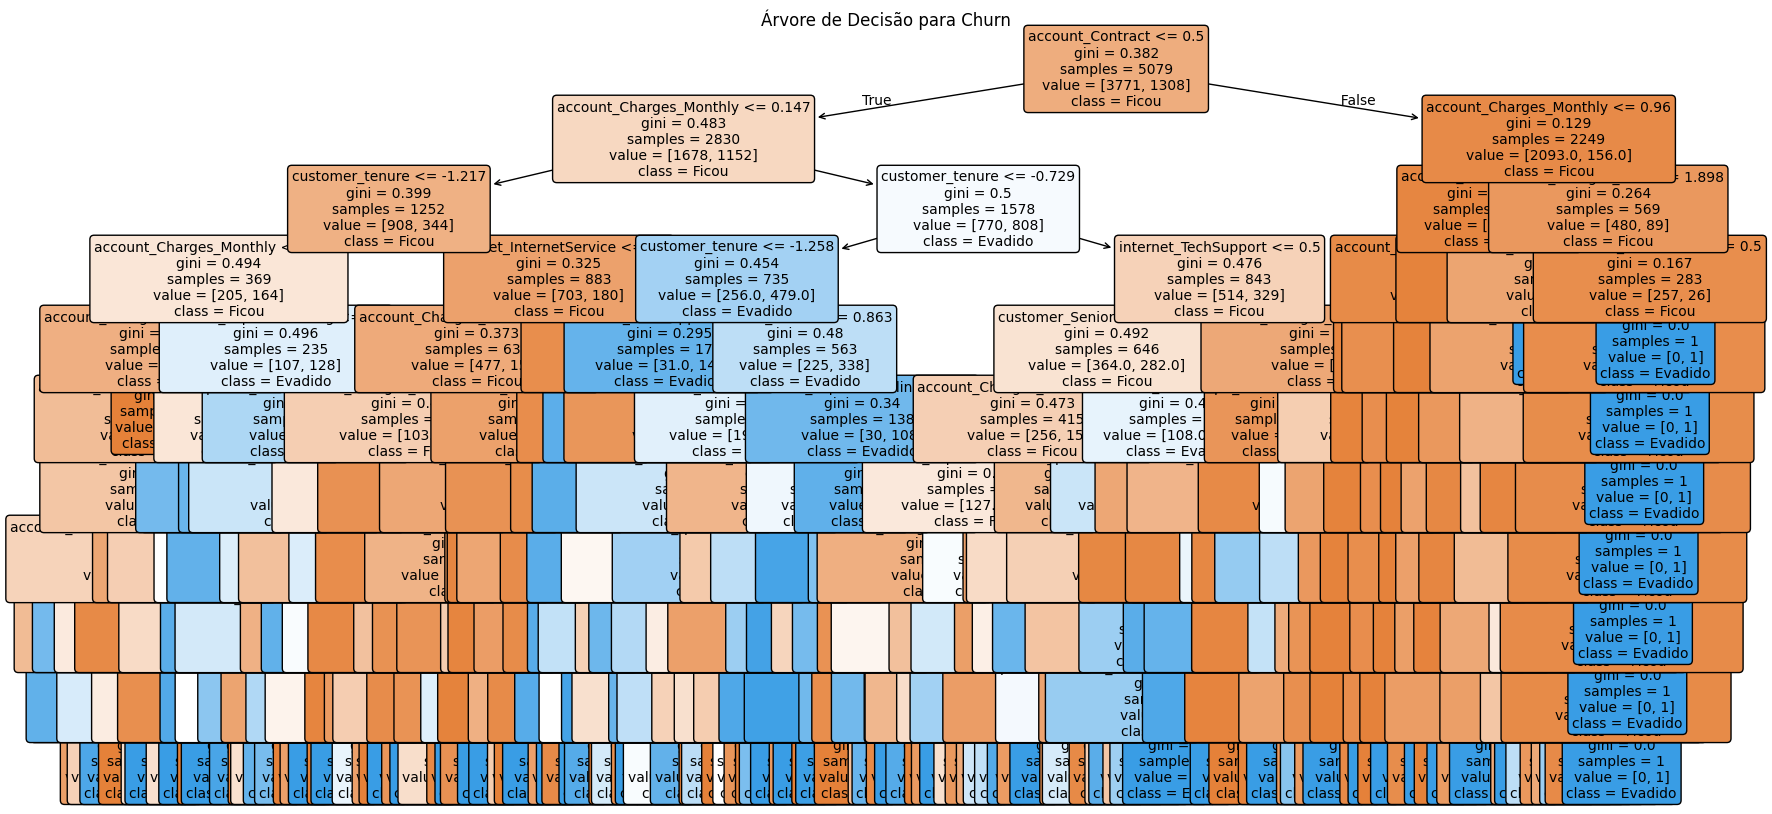

In [46]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, class_names=['Ficou', 'Evadido'],
          filled=True, rounded=True, fontsize=10)
plt.title('Árvore de Decisão para Churn')
plt.show()

**Importancia das variaveis**

In [49]:
import pandas as pd

importances = best_model.feature_importances_
importancia_df = pd.DataFrame({
    'Feature': X.columns,
    'Importância': importances
}).sort_values(by='Importância', ascending=False)

print(importancia_df.head(12))

                     Feature  Importância
14          account_Contract     0.281354
17   account_Charges_Monthly     0.184538
4            customer_tenure     0.123049
18     account_Charges_Total     0.083913
19            Contas_Diarias     0.037634
16     account_PaymentMethod     0.020609
11      internet_TechSupport     0.020281
15  account_PaperlessBilling     0.016995
1     customer_SeniorCitizen     0.012676
2           customer_Partner     0.012317
8    internet_OnlineSecurity     0.010269
6        phone_MultipleLines     0.009044


** Treinamento com Random Fores**


In [50]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(
    n_estimators=100,      # número de árvores
    max_depth=None,        # sem limitação de profundidade
    random_state=42,
    class_weight='balanced'  # lida bem com desequilíbrios de classe
)

modelo_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

**Avaliação do Modelo**

In [52]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_rf = modelo_rf.predict(X_test)
y_proba_rf = modelo_rf.predict_proba(X_test)[:, 1]  # para AUC

print(classification_report(y_test, y_pred_rf))
print(f" ROC AUC Score: {roc_auc_score(y_test, y_proba_rf):.3f}")

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1616
           1       0.64      0.45      0.53       561

    accuracy                           0.79      2177
   macro avg       0.74      0.68      0.70      2177
weighted avg       0.78      0.79      0.78      2177

 ROC AUC Score: 0.832


**Importancia das variaveis**

In [54]:
import pandas as pd

importancias_rf = modelo_rf.feature_importances_
df_importancias = pd.DataFrame({
    'Feature': X.columns,
    'Importância': importancias_rf
}).sort_values(by='Importância', ascending=False)

print(df_importancias.head(12))

                     Feature  Importância
4            customer_tenure     0.089412
18     account_Charges_Total     0.086080
17   account_Charges_Monthly     0.085353
19            Contas_Diarias     0.073374
14          account_Contract     0.066694
16     account_PaymentMethod     0.038518
7   internet_InternetService     0.034652
20              qtd_servicos     0.030201
15  account_PaperlessBilling     0.021394
11      internet_TechSupport     0.016869
8    internet_OnlineSecurity     0.016359
2           customer_Partner     0.014049


**Ajuste do modelo**

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definição da grade de parâmetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

# Instancia o modelo
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Busca com validação cruzada
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Melhor estimador
rf_best = grid_search.best_estimator_
print("Melhor configuração encontrada:")
print(grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Melhor configuração encontrada:
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


**Validação Cruzada**

In [56]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Avaliando estabilidade com cross-validation
scores = cross_val_score(rf_best, X, y, cv=10, scoring='roc_auc')

print("\n Desempenho com validação cruzada (ROC AUC):")
print(f"Média: {np.mean(scores):.4f}")
print(f"Desvio padrão: {np.std(scores):.4f}")


 Desempenho com validação cruzada (ROC AUC):
Média: 0.8337
Desvio padrão: 0.0147


**Curva de validação para hiperparametros**

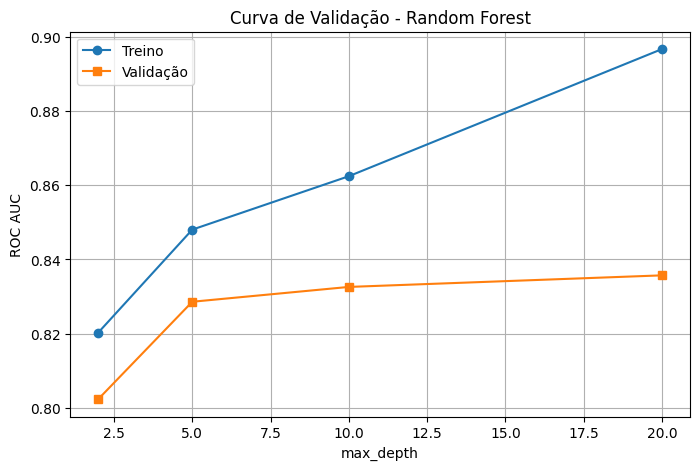

In [57]:
from sklearn.model_selection import validation_curve

param_range = [2, 5, 10, 20, None]

train_scores, test_scores = validation_curve(
    RandomForestClassifier(random_state=42),
    X, y,
    param_name='max_depth',
    param_range=param_range,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(param_range, train_mean, label='Treino', marker='o')
plt.plot(param_range, test_mean, label='Validação', marker='s')
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.title('Curva de Validação - Random Forest')
plt.legend()
plt.grid(True)
plt.show()